In [288]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
import seaborn as sns

In [289]:
pd.options.display.max_columns=50

## \#Import summary data for Fires, Earthquakes, and Covid

In [290]:
cfe = pd.read_csv('../data/covid_fire_earthquake_summary.csv')
cfe.head()

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,10,0,0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0


In [291]:
cfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fips                            58 non-null     float64
 1   county                          58 non-null     object 
 2   province_state                  58 non-null     object 
 3   covid_last_update               58 non-null     object 
 4   county_latitude                 58 non-null     float64
 5   county_longitudue               58 non-null     float64
 6   covid_confirmed                 58 non-null     int64  
 7   covid_death                     58 non-null     int64  
 8   covid_recovered                 58 non-null     int64  
 9   covid_active                    58 non-null     float64
 10  covid_indidence_rate            58 non-null     float64
 11  covid_case_fatality_ratio       58 non-null     float64
 12  county_population               58 non

In [292]:
cfe.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recovered', 'covid_active',
       'covid_indidence_rate', 'covid_case_fatality_ratio',
       'county_population', 'covid_death_per_capita',
       'covid_confirmed_per_capita', 'covid_active_cases_per_capita',
       'fires_per_county_in_2020', 'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'],
      dtype='object')

## \#Keeping only numeric columns

In [293]:
X = cfe.drop(columns = ['fips', 'county', 'province_state', 'covid_last_update'])

## \#Scaling

In [294]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

## \#Looking for an optimal KMeans model

In [295]:
def optimize_kmeans(krange, scaled_X):
    
    max_score= -1
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        if score > max_score:
            max_score = score
            k = i    
    print(f'StandardScaler silhouette score: {max_score} for optimal k of {k}')

In [296]:
optimize_kmeans(10, X_sc)

StandardScaler silhouette score: 0.35912341359750316 for optimal k of 2


## \#Double Checking the Kmeans Optimizer

In [297]:
def kmeans_range(krange, scaled_X):
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        k=i
        print(f'StandardScaler silhouette score: {score} for optimal k of {k}')
        print(f'{set(kmeans.labels_)}')
        print()

In [298]:
kmeans_range(10, X_sc)

StandardScaler silhouette score: 0.42961514444109167 for optimal k of 2
{0, 1}

StandardScaler silhouette score: 0.3415983101982077 for optimal k of 3
{0, 1, 2}

StandardScaler silhouette score: 0.279460381896323 for optimal k of 4
{0, 1, 2, 3}

StandardScaler silhouette score: 0.2071311387736691 for optimal k of 5
{0, 1, 2, 3, 4}

StandardScaler silhouette score: 0.201334968505636 for optimal k of 6
{0, 1, 2, 3, 4, 5}

StandardScaler silhouette score: 0.17677812135927942 for optimal k of 7
{0, 1, 2, 3, 4, 5, 6}

StandardScaler silhouette score: 0.1731884814454653 for optimal k of 8
{0, 1, 2, 3, 4, 5, 6, 7}

StandardScaler silhouette score: 0.1848842358888168 for optimal k of 9
{0, 1, 2, 3, 4, 5, 6, 7, 8}



## \#Reviewing Labels for best scoring model

In [299]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_sc)
score = silhouette_score(X_sc, kmeans.labels_)
print(f'StandardScaler silhouette score: {score} ')
print(f'{kmeans.labels_}')

StandardScaler silhouette score: 0.42961514444109167 
[1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


## \#Looking for an optimal DBSCAN model

In [300]:
def DBSCAN_optimize(X_scaled, min_sample_range): 
   
    max_score=-1     

    for eps in np.linspace(.2, 10, 25):
        for minsamples in range(2, min_sample_range):
            
            dbscan = DBSCAN(eps=eps, min_samples=minsamples)
            dbscan.fit(X_scaled)
            
            if len(set(dbscan.labels_)) > 2:
               
                score = silhouette_score(X_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
#                 print(f'{set(dbscan.labels_)}')
                
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_minsamples = minsamples
                    best_clusters = nclusters
    
    print(f'Best silhoute score was {round(max_score, 2)} with an eps of {round(best_eps, 2)}')
    print(f'and min_samples value of {best_minsamples} using {best_clusters} clusters.')
    return 

In [301]:
DBSCAN_optimize(X_scores_sc, 10)

Best silhoute score was 0.45 with an eps of 1.42
and min_samples value of 2 using 3 clusters.


## \#Reviewing Labels of best scoring model

In [302]:
dbscan_exact = DBSCAN(eps = 1.42, min_samples=2)
dbscan_exact.fit(X_scores_sc)
dbscan_exact.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

## \#Inspecting labels for cluster traits

In [303]:
X['labels'] = dbscan_exact.labels_

In [304]:
cfe.loc[X['labels']==1]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
13,6027.0,Inyo,California,2020-10-17 04:24:12,36.511121,-117.411198,210,15,0,195.0,1164.144354,7.142857,18039,0.000832,0.011641,0.010810,0,0,0,26,27
25,6051.0,Mono,California,2020-10-17 04:24:12,37.938993,-118.887241,174,2,0,172.0,1204.652451,1.149425,14444,0.000138,0.012047,0.011908,4,1,5,23,24


## \#Bringing in Principle Component Analysis

In [305]:
#PCA
from sklearn.decomposition import PCA

In [306]:
pca = PCA()

In [307]:
pca.fit(X_sc)
Z = pca.transform(X_sc)

## \#Inspecting Eigenvalues 

In [308]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {var_exp[:10]}')


cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {cum_var_exp[:10]}')

Explained variance (first 20 components): [0.40974631 0.21171712 0.13167955 0.09648618 0.04787144 0.04539707
 0.0359772  0.01240194 0.00414497 0.00274893]
Cumulative explained variance (first 20 components): [0.40974631 0.62146343 0.75314299 0.84962917 0.89750061 0.94289768
 0.97887488 0.99127682 0.99542179 0.99817071]


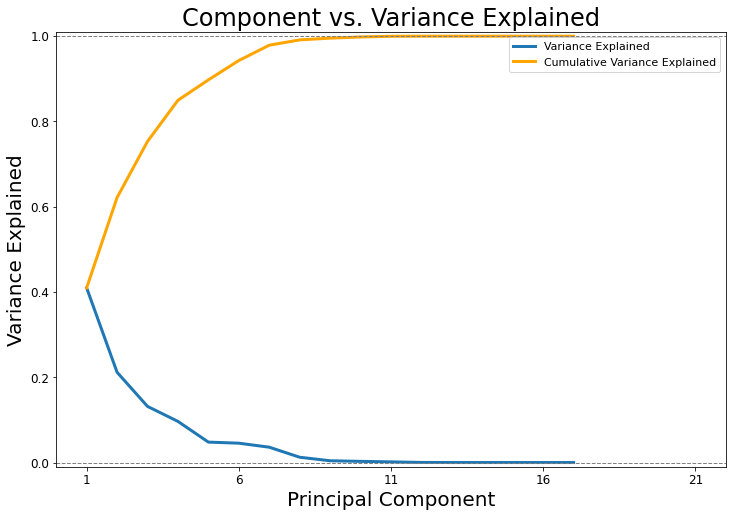

In [310]:
#code from lecture notebook

plt.figure(figsize=(12,8))

plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

## \#GridSearch with PCA and KMeans

In [311]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [312]:
pipe = make_pipeline(PCA(), KMeans())

In [313]:
params = {'pca__n_components': [2,3,4,5,6,7,8,9,10],
         'kmeans__n_clusters': [2,3,4,5,6,7,8]}

In [314]:
grid = GridSearchCV(pipe, param_grid=params,)

In [315]:
grid.fit(X_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [316]:
grid.best_params_

{'kmeans__n_clusters': 8, 'pca__n_components': 2}

In [317]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=2)), ('kmeans', KMeans())])

In [318]:
pca2 = PCA(n_components=2)

In [319]:
kmeans2 = KMeans(n_clusters=8)

In [320]:
pca2.fit(X_sc)
Z2 = pca2.transform(X_sc)

In [321]:
pd.DataFrame(Z2).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,8.805217e-17,3.732646e-17
std,2.582820e+00,1.856584e+00
min,-3.094992e+00,-7.707748e+00
25%,-1.446506e+00,-4.696856e-01
50%,-6.917862e-01,1.386691e-01
75%,8.836654e-01,6.719916e-01
max,1.020218e+01,9.192743e+00


In [322]:
grid.best_estimator_.named_steps['pca'].components_

array([[-3.06316495e-01,  2.87308631e-01,  2.72537000e-01,
         2.62710957e-01, -0.00000000e+00,  2.72736033e-01,
         2.99143400e-01,  1.38138161e-01,  2.55737628e-01,
         3.20234825e-01,  2.99153157e-01,  2.97195438e-01,
         1.23524806e-01,  6.41602475e-02,  7.80545570e-02,
         2.52907267e-01,  2.49353747e-01],
       [ 4.12354889e-02, -6.68780498e-02,  3.59092973e-01,
         3.60455552e-01,  1.11022302e-16,  3.58996071e-01,
        -2.29602708e-01, -1.04701215e-01,  3.70008688e-01,
        -2.45555467e-01, -2.29586561e-01, -2.28111904e-01,
         2.43931945e-01,  1.52506395e-01,  2.36253605e-01,
        -2.25328183e-01, -2.26041078e-01]])

In [323]:
grid.best_estimator_.named_steps['pca'].explained_variance_ratio_

array([0.40974631, 0.21171712])

In [324]:
kmeans2.fit(Z2)

KMeans()

In [325]:
score2 = silhouette_score(Z2, kmeans2.labels_)
print(f'StandardScaler silhouette score: {score2} ')
print(f'{kmeans2.labels_}')

StandardScaler silhouette score: 0.4043099251311745 
[7 0 7 7 7 7 7 0 0 5 7 0 4 2 2 2 7 7 3 6 6 7 7 6 0 6 6 7 0 5 7 0 1 7 6 1 5
 7 6 7 7 6 7 0 0 0 0 7 7 6 7 0 0 5 0 6 7 7]


In [326]:
X2 = X.copy()

In [327]:
X2['labels'] = kmeans2.labels_

In [328]:
cfe2 = cfe.copy()

In [329]:
cfe2['labels'] = kmeans2.labels_

In [330]:
cfe2.head(3)

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0,7
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0,7


In [331]:
cfe2.loc[cfe2['labels']==0]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,labels
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0,0
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.000036,0.006220,0.006184,0,0,0,0,0,0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.000021,0.006591,0.006570,3,1,4,0,0,0
11,6023.0,Humboldt,California,2020-10-17 04:24:12,40.699230,-123.876044,544,8,0,536.0,401.304239,1.470588,135558,0.000059,0.004013,0.003954,4,2,11,11,13,0
24,6049.0,Modoc,California,2020-10-17 04:24:12,41.589656,-120.724482,27,0,0,27.0,305.395317,0.000000,8841,0.000000,0.003054,0.003054,0,0,0,0,0,0
28,6057.0,Nevada,California,2020-10-17 04:24:12,39.303948,-120.762728,579,8,0,571.0,580.422034,1.381693,99755,0.000080,0.005804,0.005724,1,0,1,0,0,0
31,6063.0,Plumas,California,2020-10-17 04:24:12,40.003560,-120.839524,53,0,0,53.0,281.809964,0.000000,18807,0.000000,0.002818,0.002818,2,1,3,0,0,0
43,6087.0,Santa Cruz,California,2020-10-17 04:24:12,37.055803,-122.006652,2670,23,0,2647.0,977.259501,0.861423,273213,0.000084,0.009773,0.009688,1,0,1,0,0,0
44,6089.0,Shasta,California,2020-10-17 04:24:12,40.763914,-122.039688,1666,29,0,1637.0,925.144380,1.740696,180080,0.000161,0.009251,0.009090,3,0,3,0,0,0
45,6091.0,Sierra,California,2020-10-17 04:24:12,39.577135,-120.520070,6,0,0,6.0,199.667221,0.000000,3005,0.000000,0.001997,0.001997,2,0,2,1,1,0


In [332]:
cfe2.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recovered', 'covid_active',
       'covid_indidence_rate', 'covid_case_fatality_ratio',
       'county_population', 'covid_death_per_capita',
       'covid_confirmed_per_capita', 'covid_active_cases_per_capita',
       'fires_per_county_in_2020', 'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'labels'],
      dtype='object')

In [333]:
cfe2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio','covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'].mean()

<ipython-input-333-b352629c8bf6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cfe2.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
labels,,,,,,,,,,,,,
0,583.214286,6.071429,577.142857,526.023235,0.649173,0.000046,0.005260,0.005215,2.214286,0.500000,3.785714,0.857143,1.000000
1,61373.500000,1129.000000,60244.500000,2644.546615,1.834233,0.000484,0.026445,0.025962,12.000000,2.000000,14.000000,13.000000,13.000000
2,13856.333333,168.000000,13688.333333,3391.136053,3.128412,0.000608,0.033911,0.033303,2.333333,0.000000,2.333333,14.000000,14.666667
3,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,0.000683,0.028610,0.027927,9.000000,1.000000,10.000000,9.000000,9.000000
4,12410.000000,335.000000,12075.000000,6848.218966,2.699436,0.001849,0.068482,0.066634,1.000000,0.000000,1.000000,49.000000,50.000000
5,38791.750000,742.250000,38049.500000,2492.586511,1.798608,0.000429,0.024926,0.024497,4.000000,1.250000,5.500000,2.500000,2.500000
6,9518.700000,159.800000,9358.900000,2470.915245,1.478089,0.000384,0.024709,0.024325,3.000000,0.300000,3.600000,3.200000,3.300000
7,6468.956522,100.260870,6363.956522,1435.435769,1.662057,0.000198,0.014357,0.014156,4.565217,0.391304,6.173913,0.782609,0.782609


In [334]:
cfe2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio','covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'].describe()

<ipython-input-334-5bb7b340904e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cfe2.groupby('labels')['covid_confirmed',


covid_confirmed                                                    \
                 count           mean           std       min        25%   
labels                                                                     
0                 14.0     583.214286    786.576925       3.0      33.50   
1                  2.0   61373.500000   2701.855011   59463.0   60418.25   
2                  3.0   13856.333333  17235.323621     210.0    4172.00   
3                  1.0  287222.000000           NaN  287222.0  287222.00   
4                  1.0   12410.000000           NaN   12410.0   12410.00   
5                  4.0   38791.750000  18612.798202   17072.0   26563.25   
6                 10.0    9518.700000   6629.470970     174.0    5368.50   
7                 23.0    6468.956522   8003.808880      78.0     697.00   

                                      covid_death                           \
             50%        75%       max       count         mean         std   
labels                                                                       
0          213.5     689.25    2670.0        14.0     6.071429    9.110132   
1        61373.5   62328.75   63284.0         2.0  1129.000000  197.989899   
2         8134.0   20679.50   33225.0         3.0   168.000000  208.899497   
3       287222.0  287222.00  287222.0         1.0  6855.000000         NaN   
4        12410.0   12410.00   12410.0         1.0   335.000000         NaN   
5        40754.0   52982.50   56587.0         4.0   742.250000  505.438011   
6         9421.0   13034.25   21138.0        10.0   159.800000  156.612615   
7         3000.0    9702.00   24102.0        23.0   100.260870  142.323325   

                                                 covid_active                 \
           min      25%     50%      75%     max        count           mean   
labels                                                                         
0          0.0     0.00     2.5     8.00    29.0         14.0     577.142857   
1        989.0  1059.00  1129.0  1199.00  1269.0          2.0   60244.500000   
2         15.0    49.00    83.0   244.50   406.0          3.0   13688.333333   
3       6855.0  6855.00  6855.0  6855.00  6855.0          1.0  280367.000000   
4        335.0   335.00   335.0   335.00   335.0          1.0   12075.000000   
5        274.0   390.25   647.0   999.00  1401.0          4.0   38049.500000   
6          2.0    75.25   121.0   157.25   483.0         10.0    9358.900000   
7          1.0    13.00    32.0   130.00   464.0         23.0    6363.956522   

                                                                          \
                 std       min        25%       50%        75%       max   
labels                                                                     
0         778.651187       3.0      33.50     211.5     681.25    2647.0   
1        2503.865112   58474.0   59359.25   60244.5   61129.75   62015.0   
2       17026.919549     195.0    4123.00    8051.0   20435.00   32819.0   
3                NaN  280367.0  280367.00  280367.0  280367.00  280367.0   
4                NaN   12075.0   12075.00   12075.0   12075.00   12075.0   
5       18142.229365   16798.0   26173.00   40107.0   51983.50   55186.0   
6        6485.990997     172.0    5282.75    9286.0   12894.50   20655.0   
7        7854.552828      76.0     693.00    2950.0    9559.00   23638.0   

       covid_indidence_rate  ... active_fires_per_county fire_score  \
                      count  ...                     max      count   
labels                       ...                                      
0                      14.0  ...                     2.0       14.0   
1                       2.0  ...                     2.0        2.0   
2                       3.0  ...                     0.0        3.0   
3                       1.0  ...                     1.0        1.0   
4                       1.0  ...                     0.0        1.0   
5                       4

## \#Bringing in new dataset with engineered risk scores

In [335]:
combined_risk = pd.read_csv('../data/combined_risk_added.csv').iloc[:,1:]
combined_risk.head(3)

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0


In [336]:
combined_risk['labels'] = kmeans2.labels_

In [337]:
combined_risk.sort_values(by = 'labels')

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
28,6057.0,Nevada,California,2020-10-17 04:24:12,39.303948,-120.762728,579,8,0,571.0,580.422034,1.381693,99755,0.801965,58.042203,57.240239,1,0,1,0,0,0.138509,-2.0,-2.0,0
24,6049.0,Modoc,California,2020-10-17 04:24:12,41.589656,-120.724482,27,0,0,27.0,305.395317,0.000000,8841,0.000000,30.539532,30.539532,0,0,0,0,0,0.000000,-3.0,-2.0,0
46,6093.0,Siskiyou,California,2020-10-17 04:24:12,41.591989,-122.540743,183,0,0,183.0,420.312823,0.000000,43539,0.000000,42.031282,42.031282,5,1,6,0,0,0.000000,-1.0,-1.0,0
43,6087.0,Santa Cruz,California,2020-10-17 04:24:12,37.055803,-122.006652,2670,23,0,2647.0,977.259501,0.861423,273213,0.841834,97.725950,96.884116,1,0,1,0,0,0.031529,-2.0,-2.0,0
31,6063.0,Plumas,California,2020-10-17 04:24:12,40.003560,-120.839524,53,0,0,53.0,281.809964,0.000000,18807,0.000000,28.180996,28.180996,2,1,3,0,0,0.000000,-2.0,-1.0,0
44,6089.0,Shasta,California,2020-10-17 04:24:12,40.763914,-122.039688,1666,29,0,1637.0,925.144380,1.740696,180080,1.610395,92.514438,90.904043,3,0,3,0,0,0.096662,-2.0,-1.0,0
11,6023.0,Humboldt,California,2020-10-17 04:24:12,40.699230,-123.876044,544,8,0,536.0,401.304239,1.470588,135558,0.590153,40.130424,39.540271,4,2,11,11,13,0.108484,1.0,2.0,0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.207423,65.908537,65.701114,3,1,4,0,0,0.016320,-2.0,-1.0,0
45,6091.0,Sierra,California,2020-10-17 04:24:12,39.577135,-120.520070,6,0,0,6.0,199.667221,0.000000,3005,0.000000,19.966722,19.966722,2,0,2,1,1,0.000000,-2.0,-1.0,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,0


## \#Slicing new data for relevant columns

In [338]:
X_comb = combined_risk.iloc[:,4:]
X_comb.head()

,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
0,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,7
1,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,0
2,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0,7
3,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0,7
4,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0,7


In [339]:
X_comb_sc = ss.fit_transform(X_comb)

In [340]:
params_comb = {'pca__n_components': [2,3,4,5],
         'kmeans__n_clusters': [2,3,4,5,6,7,8,9,10]}

In [341]:
pipe_comb = make_pipeline(PCA(), KMeans())
grid_comb = GridSearchCV(pipe_comb, param_grid = params_comb)

In [342]:
grid_comb.fit(X_comb_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3, 4, 5]})

In [343]:
grid_comb.best_params_

{'kmeans__n_clusters': 10, 'pca__n_components': 2}

In [344]:
pca_comb = PCA(n_components=2)

In [345]:
kmeans_comb = KMeans(n_clusters=10)

In [346]:
pca_comb.fit(X_comb_sc)
Z_comb = pca_comb.transform(X_comb_sc)

In [347]:
pd.DataFrame(Z_comb).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,-5.359697e-17,1.064761e-16
std,2.766846e+00,1.915914e+00
min,-3.638460e+00,-6.569452e+00
25%,-1.563671e+00,-5.108493e-01
50%,-5.990588e-01,1.380386e-01
75%,8.656603e-01,4.444907e-01
max,1.096122e+01,9.987283e+00


In [348]:
grid.best_estimator_.named_steps['pca'].components_

array([[-3.06316495e-01,  2.87308631e-01,  2.72537000e-01,
         2.62710957e-01, -0.00000000e+00,  2.72736033e-01,
         2.99143400e-01,  1.38138161e-01,  2.55737628e-01,
         3.20234825e-01,  2.99153157e-01,  2.97195438e-01,
         1.23524806e-01,  6.41602475e-02,  7.80545570e-02,
         2.52907267e-01,  2.49353747e-01],
       [ 4.12354889e-02, -6.68780498e-02,  3.59092973e-01,
         3.60455552e-01,  1.11022302e-16,  3.58996071e-01,
        -2.29602708e-01, -1.04701215e-01,  3.70008688e-01,
        -2.45555467e-01, -2.29586561e-01, -2.28111904e-01,
         2.43931945e-01,  1.52506395e-01,  2.36253605e-01,
        -2.25328183e-01, -2.26041078e-01]])

In [349]:
kmeans_comb.fit(Z_comb)

KMeans(n_clusters=10)

In [350]:
score_comb = silhouette_score(Z_comb, kmeans_comb.labels_)
print(f'StandardScaler silhouette score: {score_comb} ')
print(f'{kmeans_comb.labels_}')

StandardScaler silhouette score: 0.36273000334890065 
[1 4 6 1 6 6 1 4 4 3 1 9 2 5 3 8 6 1 0 8 6 6 6 8 4 8 8 9 4 3 9 4 7 1 6 3 3
 9 8 1 9 6 1 9 4 4 4 1 1 8 9 9 4 3 9 1 9 9]


In [351]:
combined_risk2 = combined_risk.copy()
combined_risk2['labels'] = kmeans_comb.labels_
combined_risk2.sort_values(by='combined_risk')

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
24,6049.0,Modoc,California,2020-10-17 04:24:12,41.589656,-120.724482,27,0,0,27.0,305.395317,0.000000,8841,0.000000,30.539532,30.539532,0,0,0,0,0,0.000000,-3.0,-2.0,4
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,4
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.359557,62.203365,61.843808,0,0,0,0,0,0.207836,-3.0,-2.0,4
31,6063.0,Plumas,California,2020-10-17 04:24:12,40.003560,-120.839524,53,0,0,53.0,281.809964,0.000000,18807,0.000000,28.180996,28.180996,2,1,3,0,0,0.000000,-2.0,-1.0,4
37,6075.0,San Francisco,California,2020-10-17 04:24:12,37.752151,-122.438567,11808,131,0,11677.0,1339.460427,1.109417,881549,1.486021,133.946043,132.460022,0,0,0,0,0,0.012585,-2.0,-2.0,9
40,6081.0,San Mateo,California,2020-10-17 04:24:12,37.422881,-122.327555,10687,157,0,10530.0,1394.126848,1.469075,766573,2.048076,139.412685,137.364608,1,0,1,0,0,0.019164,-2.0,-2.0,9
43,6087.0,Santa Cruz,California,2020-10-17 04:24:12,37.055803,-122.006652,2670,23,0,2647.0,977.259501,0.861423,273213,0.841834,97.725950,96.884116,1,0,1,0,0,0.031529,-2.0,-2.0,9
45,6091.0,Sierra,California,2020-10-17 04:24:12,39.577135,-120.520070,6,0,0,6.0,199.667221,0.000000,3005,0.000000,19.966722,19.966722,2,0,2,1,1,0.000000,-2.0,-1.0,4
50,6101.0,Sutter,California,2020-10-17 04:24:12,39.034175,-121.694590,1793,12,0,1781.0,1849.006404,0.669269,96971,1.237483,184.900640,183.663157,0,0,0,0,0,0.069017,-2.0,-2.0,9
28,6057.0,Nevada,California,2020-10-17 04:24:12,39.303948,-120.762728,579,8,0,571.0,580.422034,1.381693,99755,0.801965,58.042203,57.240239,1,0,1,0,0,0.138509,-2.0,-2.0,4


In [352]:
combined_risk.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recovered', 'covid_active',
       'covid_indidence_rate', 'covid_case_fatality_ratio',
       'county_population', 'covid_death_per_10000',
       'covid_confirmed_per_10000', 'covid_active_cases_per_capita',
       'fires_per_county_in_2020', 'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score',
       'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2',
       'labels'],
      dtype='object')

In [353]:
combined_risk.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2'].mean()

<ipython-input-353-92b9a16a2b77>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_risk.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
labels,,,,,,,,,,,,,,
0,583.214286,6.071429,577.142857,526.023235,0.649173,52.146984,2.214286,0.500000,3.785714,0.857143,1.000000,0.076398,-1.714286,-0.928571
1,61373.500000,1129.000000,60244.500000,2644.546615,1.834233,259.618143,12.000000,2.000000,14.000000,13.000000,13.000000,0.007873,3.500000,2.500000
2,13856.333333,168.000000,13688.333333,3391.136053,3.128412,333.029478,2.333333,0.000000,2.333333,14.000000,14.666667,1.346656,1.666667,2.333333
3,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,279.274840,9.000000,1.000000,10.000000,9.000000,9.000000,0.002377,3.000000,1.000000
4,12410.000000,335.000000,12075.000000,6848.218966,2.699436,666.335568,1.000000,0.000000,1.000000,49.000000,50.000000,0.148963,9.000000,4.000000
5,38791.750000,742.250000,38049.500000,2492.586511,1.798608,244.965156,4.000000,1.250000,5.500000,2.500000,2.500000,0.015418,0.500000,-0.500000
6,9518.700000,159.800000,9358.900000,2470.915245,1.478089,243.254750,3.000000,0.300000,3.600000,3.200000,3.300000,0.130901,0.100000,-0.600000
7,6468.956522,100.260870,6363.956522,1435.435769,1.662057,141.562563,4.565217,0.391304,6.173913,0.782609,0.782609,0.248121,-0.391304,-0.130435


In [354]:
combined_risk2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2'].mean()

<ipython-input-354-3e9200c4c291>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_risk2.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
labels,,,,,,,,,,,,,,
0,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,279.274840,9.000000,1.000000,10.000000,9.000000,9.000000,0.002377,3.000000,1.000000
1,11387.636364,178.000000,11199.727273,1642.434891,1.234542,162.381153,6.272727,0.272727,7.454545,0.454545,0.454545,0.038606,0.090909,-0.363636
2,12410.000000,335.000000,12075.000000,6848.218966,2.699436,666.335568,1.000000,0.000000,1.000000,49.000000,50.000000,0.148963,9.000000,4.000000
3,41309.166667,727.333333,40581.833333,2731.456420,1.679937,268.775542,4.666667,1.166667,6.000000,6.333333,6.500000,0.013813,1.166667,0.000000
4,398.100000,4.200000,393.900000,442.239281,0.401514,43.925994,1.900000,0.400000,2.800000,0.100000,0.100000,0.045933,-2.100000,-1.300000
5,210.000000,15.000000,195.000000,1164.144354,7.142857,108.099119,0.000000,0.000000,0.000000,26.000000,27.000000,3.959675,1.000000,8.000000
6,2320.444444,36.777778,2283.666667,1530.046069,2.425248,150.147336,3.333333,0.555556,5.666667,1.777778,1.777778,0.575181,-0.444444,0.666667
7,63284.000000,1269.000000,62015.000000,2561.539028,2.005246,251.017386,18.000000,2.000000,20.000000,14.000000,14.000000,0.008117,5.000000,4.000000
8,10238.428571,180.857143,10057.571429,3050.234410,1.517871,300.415923,3.428571,0.428571,4.285714,4.142857,4.285714,0.157988,0.857143,-0.428571


## \#Looking for maximum natural clusters

In [355]:
params_comb2 = {'pca__n_components': [2,3,4,5],
         'kmeans__n_clusters': range(8,28)}

In [356]:
grid_comb2 = GridSearchCV(pipe_comb, param_grid = params_comb2)

In [357]:
grid_comb2.fit(X_comb_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': range(8, 28),
                         'pca__n_components': [2, 3, 4, 5]})

In [358]:
grid_comb2.best_params_

{'kmeans__n_clusters': 27, 'pca__n_components': 2}

In [359]:
X_scores = cfe[['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita']]
ss_scores = StandardScaler()
X_scores_sc = ss_scores.fit_transform(X_scores)

In [361]:
scaled_df = pd.DataFrame(X_scores_sc, columns=['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita'] )
scaled_df.head()

,earthquakes_score,fire_score,covid_confirmed_per_capita
0,-0.414884,-0.268998,-0.310412
1,-0.414884,-1.200455,-1.171588
2,-0.414884,-0.734726,-0.761753
3,-0.414884,1.128187,-0.288004
4,-0.414884,-0.501862,-0.806826
5,-0.414884,1.128187,0.641783
6,-0.414884,0.196730,-0.138229
7,-0.414884,-1.200455,-0.886151
8,-0.414884,-0.268998,-0.856469
9,-0.178970,0.662458,0.999085


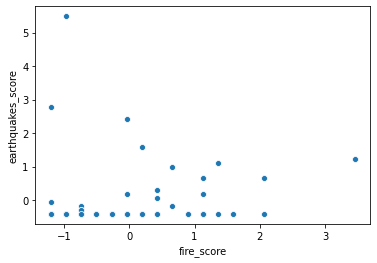

In [362]:
sns.scatterplot(scaled_df['fire_score'],scaled_df['earthquakes_score'])

In [363]:
X.columns

Index(['county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recovered', 'covid_active',
       'covid_indidence_rate', 'covid_case_fatality_ratio',
       'county_population', 'covid_death_per_capita',
       'covid_confirmed_per_capita', 'covid_active_cases_per_capita',
       'fires_per_county_in_2020', 'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'labels'],
      dtype='object')

In [364]:
X3 = X.drop(columns = ['county_latitude', 'county_longitudue'])

In [365]:
X3_sc = ss.fit_transform(X3)

In [366]:
pipe2 = make_pipeline(PCA(), KMeans())

In [367]:
params = {'pca__n_components': [2,3,4,5,6,7,8,9,10],
         'kmeans__n_clusters': [2,3,4,5,6,7,8]}

In [368]:
grid2 = GridSearchCV(pipe2, param_grid=params,)

In [369]:
grid2.fit(X3_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [370]:
grid2.best_params_

{'kmeans__n_clusters': 8, 'pca__n_components': 2}

In [371]:
pca3 = PCA(n_components=2)

In [372]:
kmeans3 = KMeans(n_clusters=8)

In [373]:
pca3.fit(X3_sc)
Z3 = pca3.transform(X3_sc)

In [374]:
pd.DataFrame(Z3).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,-1.416491e-16,-1.962032e-17
std,2.401960e+00,1.858423e+00
min,-2.671953e+00,-8.044870e+00
25%,-1.191107e+00,-4.791743e-01
50%,-4.731955e-01,1.023910e-01
75%,7.350248e-01,6.536872e-01
max,1.020796e+01,9.055679e+00


In [375]:
kmeans3.fit(Z3)

KMeans()

In [376]:
score2 = silhouette_score(Z3, kmeans3.labels_)
print(f'StandardScaler silhouette score: {score2} ')
print(f'{kmeans3.labels_}')

StandardScaler silhouette score: 0.3848799262812092 
[0 6 0 0 0 0 0 6 6 4 0 0 2 5 3 3 0 0 1 5 5 6 0 5 6 0 5 0 6 4 6 6 7 0 0 4 4
 0 5 0 0 0 0 6 6 6 6 0 0 5 0 0 6 4 6 0 0 0]


In [377]:
combined_risk2.head(10)

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,1
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,4
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0,6
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0,1
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0,6
5,6011.0,Colusa,California,2020-10-17 04:24:12,39.178820,-122.233173,545,6,0,539.0,2529.354434,1.100917,21547,2.784610,252.935443,250.150833,4,1,10,0,0,0.510938,1.0,1.0,6
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,2.028563,155.566498,153.537935,5,0,6,0,0,0.011304,-0.0,-1.0,1
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.359557,62.203365,61.843808,0,0,0,0,0,0.207836,-3.0,-2.0,4
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.207423,65.908537,65.701114,3,1,4,0,0,0.016320,-2.0,-1.0,4
9,6019.0,Fresno,California,2020-10-17 04:24:12,36.757339,-119.646695,29727,429,0,29298.0,2975.374862,1.443133,999101,4.293860,297.537486,293.243626,5,2,8,2,2,0.014444,1.0,0.0,3


## \#Labeling the Clusters according to risk level

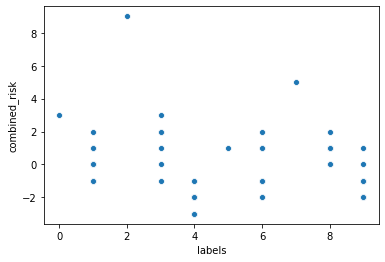

In [378]:
sns.scatterplot(combined_risk2['labels'], combined_risk2['combined_risk']);

In [379]:
combined_risk2.groupby('labels')['combined_risk'].mean().sort_values()

labels
4   -2.100000
9   -1.181818
6   -0.444444
1    0.090909
8    0.857143
5    1.000000
3    1.166667
0    3.000000
7    5.000000
2    9.000000
Name: combined_risk, dtype: float64

In [380]:
combined_risk2['risk_index'] = combined_risk2['labels'].map({1:0, 7:1, 9:2, 5:3, 0:4, 6:4, 4:5, 2:6, 8:7, 3:8})

In [381]:
combined_risk2.head()

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels,risk_index
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,1,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,4,5
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0,6,4
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0,1,0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0,6,4


In [382]:
combined_risk2.loc[combined_risk2['risk_index']==0]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels,risk_index
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,1,0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0,1,0
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,2.028563,155.566498,153.537935,5,0,6,0,0,0.011304,-0.0,-1.0,1,0
10,6021.0,Glenn,California,2020-10-17 04:24:12,39.598759,-122.393845,638,3,0,635.0,2247.032719,0.470219,28393,1.056598,224.703272,223.646673,6,1,12,0,0,0.165611,2.0,1.0,1,0
17,6035.0,Lassen,California,2020-10-17 04:24:12,40.673113,-120.593510,752,1,0,751.0,2459.686652,0.132979,30573,0.327086,245.968665,245.641579,10,0,10,0,0,0.043495,1.0,0.0,1,0
33,6067.0,Sacramento,California,2020-10-17 04:24:12,38.451068,-121.342537,24102,464,0,23638.0,1552.905884,1.925151,1552058,2.989579,155.290588,152.301009,5,0,5,0,0,0.012404,-1.0,-1.0,1,0
39,6079.0,San Luis Obispo,California,2020-10-17 04:24:12,35.388220,-120.403903,3969,32,0,3937.0,1401.923627,0.806248,283111,1.130299,140.192363,139.062064,14,0,14,0,0,0.028478,1.0,1.0,1,0
42,6085.0,Santa Clara,California,2020-10-17 04:24:12,37.231049,-121.697046,22974,373,0,22492.0,1185.723800,1.623574,1927852,1.934796,119.168899,116.668707,6,0,7,4,4,0.008422,0.0,0.0,1,0
47,6095.0,Solano,California,2020-10-17 04:24:12,38.268274,-121.935711,7009,74,0,6935.0,1565.756641,1.055785,447643,1.653103,156.575664,154.922561,5,0,6,0,0,0.023585,-0.0,-1.0,1,0
48,6097.0,Sonoma,California,2020-10-17 04:24:12,38.527464,-122.886251,8717,129,0,8588.0,1763.375518,1.479867,494336,2.609561,176.337552,173.727991,4,1,6,0,0,0.029936,-0.0,-1.0,1,0


## \#Writing cluster-labeled dataframe to CSV

In [383]:
#combined_risk2.to_csv('../data/combined_risk_labels.csv', index=False)

## \#Obtaining figures

In [384]:
import sklearn

In [385]:
sklearn.set_config(display='diagram')
grid_comb

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3, 4, 5]})

In [386]:
combined_risk2.shape

(58, 26)

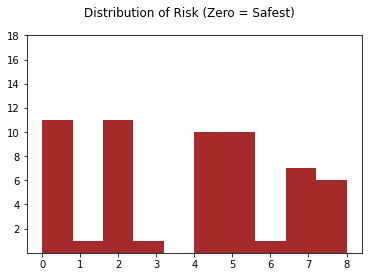

In [387]:
plt.hist(combined_risk2['risk_index'], color = 'brown');
plt.suptitle('Distribution of Risk (Zero = Safest)');
plt.yticks(ticks = [2,4,6,8,10,12,14,16,18]);
#plt.savefig('../figures/Cluster-hist.png')

In [388]:
combined_risk2['risk_index'].value_counts()

2    11
0    11
5    10
4    10
7     7
8     6
6     1
3     1
1     1
Name: risk_index, dtype: int64

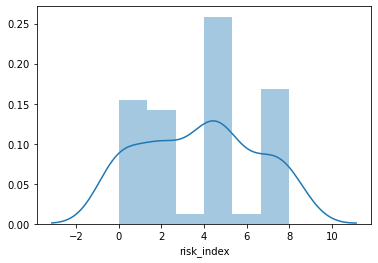

In [389]:
sns.distplot(combined_risk2['risk_index'])

## \#Looking at Imperial County

In [390]:
earth = pd.read_csv('../data/covid_fire_earthquake.csv')

In [391]:
earth.head()

,fips,county,province_state,country,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,combined_key,covid_indidence_rate,covid_case_fatality_ratio,county_population,earthquake_id,eipicenter,earthquake_date,earthquake_latidute,earthquake_longitude,magnitude,fire_name,fire_is_final,fire_started,acres_burned,fire_percent_contained,fire_longitude,fire_latitude,fire_is_active,is_calfireincident,fire_location
0,6001.0,Alameda,California,US,2020-10-17 04:24:12,37.646294,-121.892927,22408.0,439.0,0.0,21969.0,"Alameda, California, US",1340.729443,1.959122,1671329.0,NaN,NaN,NaN,NaN,NaN,NaN,Sheridan Fire,True,2020-07-04T15:04:41Z,108.0,100.0,-121.876277,37.536015,False,True,"Sheridan Road, south of Sunol in Santa Clara c..."
1,6001.0,Alameda,California,US,2020-10-17 04:24:12,37.646294,-121.892927,22408.0,439.0,0.0,21969.0,"Alameda, California, US",1340.729443,1.959122,1671329.0,NaN,NaN,NaN,NaN,NaN,NaN,Hollow Fire,True,2020-07-16T18:14:18Z,253.0,100.0,-121.593740,37.640440,False,True,"Tesla Road and McLaughlin Road, Southeast of L..."
2,6001.0,Alameda,California,US,2020-10-17 04:24:12,37.646294,-121.892927,22408.0,439.0,0.0,21969.0,"Alameda, California, US",1340.729443,1.959122,1671329.0,NaN,NaN,NaN,NaN,NaN,NaN,SCU Lightning Complex,True,2020-08-18T09:25:25Z,396624.0,100.0,-121.304350,37.439437,False,True,Multiple locations throughout Santa Clara Coun...
3,6003.0,Alpine,California,US,2020-10-17 04:24:12,38.596786,-119.822359,3.0,0.0,0.0,3.0,"Alpine, California, US",265.721878,0.000000,1129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6005.0,Amador,California,US,2020-10-17 04:24:12,38.445831,-120.656960,309.0,16.0,0.0,293.0,"Amador, California, US",777.319380,5.177994,39752.0,NaN,NaN,NaN,NaN,NaN,NaN,Copper Fire,True,2020-09-30T13:09:00Z,48.0,100.0,-121.003602,38.493750,False,True,"Copper Hill Rd. off Hwy 16, east of Rancho Mur..."


In [392]:
earth.loc[earth['county']=='Imperial']['magnitude']

91     3.5
92     3.6
93     3.7
94     3.7
95     3.9
96     3.6
97     3.5
98     3.7
99     4.5
100    3.4
101    3.5
102    3.5
103    3.5
104    3.6
105    4.1
106    4.1
107    3.8
108    4.2
109    3.8
110    3.9
111    4.9
112    3.7
113    3.4
114    4.3
115    3.6
116    3.6
117    4.1
118    5.1
119    3.5
120    4.0
121    3.5
122    3.7
123    4.0
124    4.6
125    3.5
126    3.7
127    3.6
128    3.9
129    3.6
130    4.0
131    3.5
132    3.5
133    4.0
134    3.8
135    3.5
136    3.5
137    3.7
138    3.5
139    3.1
Name: magnitude, dtype: float64

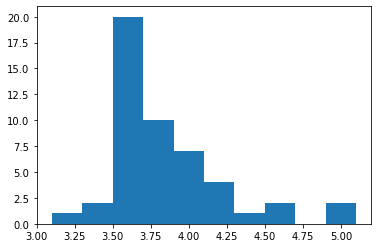

In [393]:
plt.hist(earth.loc[earth['county']=='Imperial']['magnitude']);

In [394]:
earth.loc[earth['county']=='Imperial']['magnitude'].value_counts().sort_values()

4.2     1
4.3     1
4.9     1
4.6     1
5.1     1
3.1     1
4.5     1
3.4     2
3.9     3
3.8     3
4.1     3
4.0     4
3.6     7
3.7     7
3.5    13
Name: magnitude, dtype: int64

In [395]:
earth.loc[earth['county']=='Imperial']['magnitude'].value_counts(normalize = True).sort_values()

4.2    0.020408
4.3    0.020408
4.9    0.020408
4.6    0.020408
5.1    0.020408
3.1    0.020408
4.5    0.020408
3.4    0.040816
3.9    0.061224
3.8    0.061224
4.1    0.061224
4.0    0.081633
3.6    0.142857
3.7    0.142857
3.5    0.265306
Name: magnitude, dtype: float64

In [396]:
earth.loc[earth['magnitude']>5]

,fips,county,province_state,country,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,combined_key,covid_indidence_rate,covid_case_fatality_ratio,county_population,earthquake_id,eipicenter,earthquake_date,earthquake_latidute,earthquake_longitude,magnitude,fire_name,fire_is_final,fire_started,acres_burned,fire_percent_contained,fire_longitude,fire_latitude,fire_is_active,is_calfireincident,fire_location
71,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73355700,"15 km (9.375 mi) W of Petrolia, CA",2020-03-18,40.35,-124.46,5.2,August Complex (includes Doe Fire),False,2020-08-16T20:37:26Z,1032209.0,80.0,-122.673000,39.776000,True,True,"Mendocino, Humboldt, Trinity, Tehama, Glenn, ..."
72,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73355700,"15 km (9.375 mi) W of Petrolia, CA",2020-03-18,40.35,-124.46,5.2,Red Salmon Complex,False,2020-08-18T09:49:34.58Z,143923.0,75.0,-123.407000,41.168000,True,False,"near Salmon Mountain, Northeast of Willow Creek"
73,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73355700,"15 km (9.375 mi) W of Petrolia, CA",2020-03-18,40.35,-124.46,5.2,Milepost 21 Fire,True,2020-07-20T15:44:53Z,100.0,100.0,-123.698622,41.184945,False,False,"Highway 96 and Deerhorn Rd, southeast of Weitc..."
74,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73355700,"15 km (9.375 mi) W of Petrolia, CA",2020-03-18,40.35,-124.46,5.2,Lincoln Fire,True,2020-07-27T18:50:25Z,25.0,100.0,-124.199540,40.788040,False,False,"Bendixsen Street and Simpson Private Road, Samoa"
79,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73351710,"69 km (43.125 mi) W of Petrolia, CA",2020-03-08,40.39,-125.09,5.8,August Complex (includes Doe Fire),False,2020-08-16T20:37:26Z,1032209.0,80.0,-122.673000,39.776000,True,True,"Mendocino, Humboldt, Trinity, Tehama, Glenn, ..."
80,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73351710,"69 km (43.125 mi) W of Petrolia, CA",2020-03-08,40.39,-125.09,5.8,Red Salmon Complex,False,2020-08-18T09:49:34.58Z,143923.0,75.0,-123.407000,41.168000,True,False,"near Salmon Mountain, Northeast of Willow Creek"
81,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73351710,"69 km (43.125 mi) W of Petrolia, CA",2020-03-08,40.39,-125.09,5.8,Milepost 21 Fire,True,2020-07-20T15:44:53Z,100.0,100.0,-123.698622,41.184945,False,False,"Highway 96 and Deerhorn Rd, southeast of Weitc..."
82,6023.0,Humboldt,California,US,2020-10-17 04:24:12,40.699230,-123.876044,544.0,8.0,0.0,536.0,"Humboldt, California, US",401.304239,1.470588,135558.0,73351710,"69 km (43.125 mi) W of Petrolia, CA",2020-03-08,40.39,-125.09,5.8,Lincoln Fire,True,2020-07-27T18:50:25Z,25.0,100.0,-124.199540,40.788040,False,False,"Bendixsen Street and Simpson Private Road, Samoa"
118,6025.0,Imperial,California,US,2020-10-17 04:24:12,33.039308,-115.366904,12410.0,335.0,0.0,12075.0,"Imperial, California, US",6848.218966,2.699436,181215.0,39347679,"88 km (55 mi) ESE of Maneadero, B.C., MX",2020-08-17,31.54,-115.66,5.1,Carter Fire,True,2020-04-04T20:22:08Z,275.0,100.0,-115.586500,32.934320,False,False,"Off Austin Road and Weaver Road, South of Bra..."
153,6027.0,Inyo,California,US,2020-10-17 04:24:12,36.511121,-117.411198,210.0,15.0,0.0,195.0,"Inyo, California, US",1164.144354,7.142857,18039.0,39493944,"18 km (11.25 mi) SSE of Lone 